In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Admin/Desktop/Github_projects/Stock_Market_for_noobs/ZDGE.csv" , encoding = "ISO-8859-1")
df.shape

(755, 7)

In [3]:
df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,2.60,2.810,2.520,2.52,2.52,2300
2018-09-11,2.52,2.670,2.330,2.33,2.33,5500
2018-09-12,2.59,2.590,2.513,2.59,2.59,1800
2018-09-13,2.60,2.600,2.420,2.42,2.42,2900
2018-09-14,2.69,2.690,2.420,2.42,2.42,1700
...,...,...,...,...,...,...
2021-09-01,15.64,15.779,15.090,15.25,15.25,70500
2021-09-02,15.21,15.410,14.900,15.21,15.21,130000
2021-09-03,15.30,15.430,15.000,15.20,15.20,57800


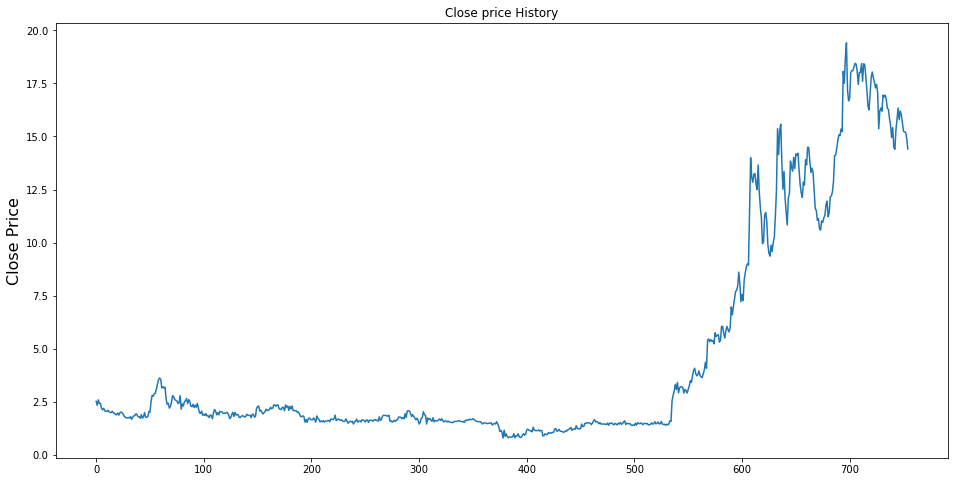

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.ylabel('Close Price', fontsize=16)
plt.show()

In [5]:
df1 = df.dropna(how="any")

In [6]:
data1 = df1.filter(['Close'])
data1

,Close
0,2.52
1,2.33
2,2.59
3,2.42
4,2.42
...,...
750,15.25
751,15.21
752,15.20
753,14.92


In [7]:
data = data1.values
data

array([[ 2.52    ],
       [ 2.33    ],
       [ 2.59    ],
       [ 2.42    ],
       [ 2.42    ],
       [ 2.19    ],
       [ 2.121   ],
       [ 2.19    ],
       [ 2.08    ],
       [ 2.04    ],
       [ 2.05    ],
       [ 2.1     ],
       [ 2.02    ],
       [ 2.      ],
       [ 1.99    ],
       [ 2.05    ],
       [ 1.97    ],
       [ 1.96    ],
       [ 1.89    ],
       [ 1.89    ],
       [ 1.97    ],
       [ 1.87    ],
       [ 1.97    ],
       [ 2.02    ],
       [ 1.98    ],
       [ 1.93    ],
       [ 1.82    ],
       [ 1.77    ],
       [ 1.75    ],
       [ 1.73    ],
       [ 1.76    ],
       [ 1.73    ],
       [ 1.8     ],
       [ 1.67    ],
       [ 1.77    ],
       [ 1.84    ],
       [ 1.85    ],
       [ 1.94    ],
       [ 1.874   ],
       [ 1.79    ],
       [ 1.8     ],
       [ 1.72    ],
       [ 1.89    ],
       [ 1.73    ],
       [ 1.8     ],
       [ 1.99    ],
       [ 1.77    ],
       [ 1.77    ],
       [ 1.8     ],
       [ 2.039   ],


In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[9.28609769e-02],
       [8.26623725e-02],
       [9.66183575e-02],
       [8.74932904e-02],
       [8.74932904e-02],
       [7.51476114e-02],
       [7.14439077e-02],
       [7.51476114e-02],
       [6.92431562e-02],
       [6.70960816e-02],
       [6.76328502e-02],
       [7.03166935e-02],
       [6.60225443e-02],
       [6.49490070e-02],
       [6.44122383e-02],
       [6.76328502e-02],
       [6.33387010e-02],
       [6.28019324e-02],
       [5.90445518e-02],
       [5.90445518e-02],
       [6.33387010e-02],
       [5.79710145e-02],
       [6.33387010e-02],
       [6.60225443e-02],
       [6.38754697e-02],
       [6.11916264e-02],
       [5.52871712e-02],
       [5.26033280e-02],
       [5.15297907e-02],
       [5.04562534e-02],
       [5.20665593e-02],
       [5.04562534e-02],
       [5.42136339e-02],
       [4.72356414e-02],
       [5.26033280e-02],
       [5.63607085e-02],
       [5.68974772e-02],
       [6.17283951e-02],
       [5.81857220e-02],
       [5.36768653e-02],


In [9]:
train_data_len = math.ceil(len(data) * 0.70)
train_data = scaled_data[0:train_data_len, :]

In [10]:
p=120
x_train = []
y_train = []
for i in range(p, len(train_data)):
    x_train.append(train_data[i-p:i, 0])
    y_train.append(train_data[i, 0])
    if i<=p+1:
        print(x_train)
        print(y_train)

[array([0.09286098, 0.08266237, 0.09661836, 0.08749329, 0.08749329,
       0.07514761, 0.07144391, 0.07514761, 0.06924316, 0.06709608,
       0.06763285, 0.07031669, 0.06602254, 0.06494901, 0.06441224,
       0.06763285, 0.0633387 , 0.06280193, 0.05904455, 0.05904455,
       0.0633387 , 0.05797101, 0.0633387 , 0.06602254, 0.06387547,
       0.06119163, 0.05528717, 0.05260333, 0.05152979, 0.05045625,
       0.05206656, 0.05045625, 0.05421363, 0.04723564, 0.05260333,
       0.05636071, 0.05689748, 0.0617284 , 0.05818572, 0.05367687,
       0.05421363, 0.04991948, 0.05904455, 0.05045625, 0.05421363,
       0.06441224, 0.05260333, 0.05260333, 0.05421363, 0.0670424 ,
       0.06548578, 0.09248524, 0.1078905 , 0.10574342, 0.11218465,
       0.11325819, 0.12453033, 0.13633924, 0.14814815, 0.15190553,
       0.14814815, 0.1266774 , 0.12989801, 0.1266774 , 0.12860977,
       0.09822866, 0.08534622, 0.08803006, 0.07568438, 0.07997853,
       0.0907139 , 0.10735373, 0.10413312, 0.09715513, 0.0955

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(409, 120, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
103/103 [==============================] - 9s 84ms/step - loss: 1.2401e-04
Epoch 2/10
103/103 [==============================] - 6s 60ms/step - loss: 8.4400e-05
Epoch 3/10
103/103 [==============================] - 6s 59ms/step - loss: 6.1081e-05
Epoch 4/10
103/103 [==============================] - 6s 59ms/step - loss: 5.9719e-05
Epoch 5/10
103/103 [==============================] - 6s 59ms/step - loss: 4.5208e-05
Epoch 6/10
103/103 [==============================] - 6s 59ms/step - loss: 4.9092e-05
Epoch 7/10
103/103 [==============================] - 8s 74ms/step - loss: 4.8193e-05
Epoch 8/10
103/103 [==============================] - 7s 65ms/step - loss: 4.3742e-05
Epoch 9/10
103/103 [==============================] - 7s 70ms/step - loss: 4.0908e-05
Epoch 10/10
103/103 [==============================] - 7s 68ms/step - loss: 3.8136e-05


In [14]:
test_data = scaled_data[train_data_len - p: , :]
x_test = []
y_test = data[train_data_len:, :]
for i in range(p, len(test_data)):
    x_test.append(test_data[i-p:i, 0])

In [15]:
x_test = np.array(x_test)
x_test.shape

(226, 120)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)

In [18]:
rmse = np.sqrt(np.mean(predict - y_test)**2)
rmse

0.25581290550839586

<ipython-input-19-fc40edb2b829>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predict


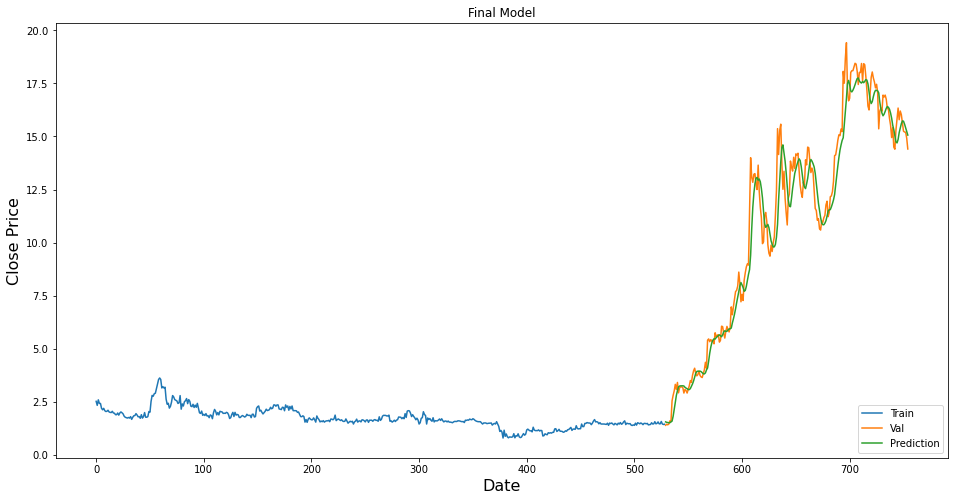

In [19]:
train = data1[:train_data_len]
valid = data1[train_data_len:]
valid['Prediction'] = predict
plt.figure(figsize=(16,8))
plt.title('Final Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [36]:
df2 = pd.read_csv("C:/Users/Admin/Desktop/Github_projects/Stock_Market_for_noobs/ZDGE.csv" , encoding = "ISO-8859-1")
new_df = df2.filter(['Close'])
new_df1 = new_df.dropna(how="any")
new_df2 = new_df1.values
data2_len = 342
data2 = new_df2[0:data2_len, :]
data2.shape

(342, 1)

In [37]:
last_days = data2[-p:]
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1.6633457]]


In [38]:
len(test_data)

346

In [39]:
x_input = test_data[226:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = p
i=0
num = int(input())
while(i<num):
    
    if(len(temp_input)>p):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

20
121
[[0.7531951069831848], [0.7455679178237915], [0.7403163313865662], [0.736233651638031], [0.7327752709388733], [0.7296833992004395], [0.7268266081809998], [0.7241317629814148], [0.7215535640716553], [0.719062328338623], [0.716637372970581], [0.7142648100852966], [0.7119352221488953], [0.7096426486968994], [0.7073838114738464], [0.7051571011543274], [0.7029621601104736], [0.7007993459701538], [0.69866943359375], [0.6965734958648682]]


In [40]:
output = scaler.inverse_transform(lst_output)
output

array([[14.82202484],
       [14.67993031],
       [14.58209325],
       [14.50603293],
       [14.4416033 ],
       [14.38400173],
       [14.33077971],
       [14.28057474],
       [14.2325429 ],
       [14.18613118],
       [14.14095426],
       [14.09675341],
       [14.05335319],
       [14.01064255],
       [13.96856041],
       [13.92707679],
       [13.88618504],
       [13.84589182],
       [13.80621155],
       [13.76716423]])

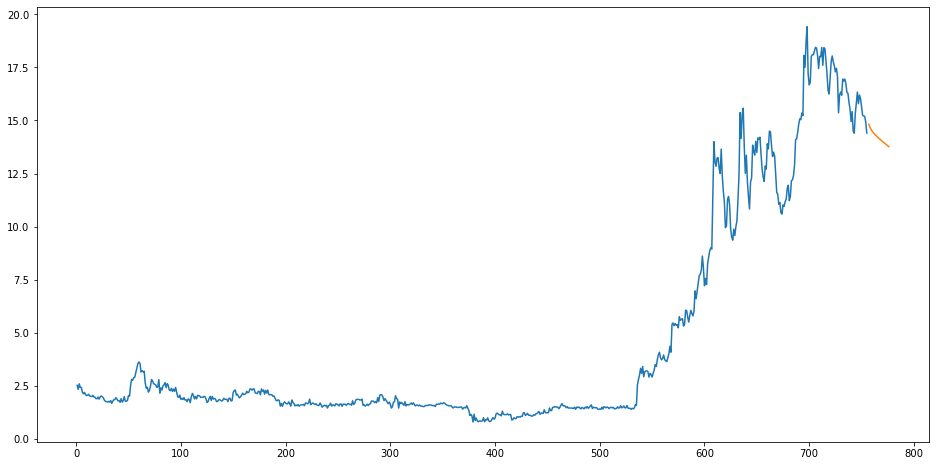

In [41]:
day_new = np.arange(1,756)
day_pred = np.arange(757,757+num)
plt.figure(figsize=(16,8))
plt.plot(day_new,data1[['Close']])
plt.plot(day_pred,output)
plt.show()

In [42]:
y = test_data[226:].reshape(1,-1)
temp1 = list(y)
temp1 = temp1[0].tolist()
lst1 = []
n1 = p
j=0
num = 10
while(j<num):
    
    if(len(temp1)>p):
        y=np.array(temp1[1:])
        y=y.reshape(1,-1)
        y = y.reshape((1, n1, 1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        temp1=temp1[1:]
        lst1.extend(yhat1.tolist())
        j=j+1
    else:
        y = y.reshape((1, n1,1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        print(len(temp1))
        lst1.extend(yhat1.tolist())
        j=j+1
    

print(lst1)

121
[[0.7531951069831848], [0.7455679178237915], [0.7403163313865662], [0.736233651638031], [0.7327752709388733], [0.7296833992004395], [0.7268266081809998], [0.7241317629814148], [0.7215535640716553], [0.719062328338623]]


In [43]:
out = scaler.inverse_transform(lst1)
out

array([[14.82202484],
       [14.67993031],
       [14.58209325],
       [14.50603293],
       [14.4416033 ],
       [14.38400173],
       [14.33077971],
       [14.28057474],
       [14.2325429 ],
       [14.18613118]])

In [44]:
lst2 = out.tolist()
lst2

[[14.822024843096735],
 [14.679930309057236],
 [14.582093253731728],
 [14.506032930016518],
 [14.44160329759121],
 [14.384001727104188],
 [14.330779710412026],
 [14.280574744343758],
 [14.232542898654938],
 [14.186131176948548]]

In [45]:
from itertools import chain

In [46]:
lst3 = list(chain.from_iterable(lst2))
lst3

[14.822024843096735,
 14.679930309057236,
 14.582093253731728,
 14.506032930016518,
 14.44160329759121,
 14.384001727104188,
 14.330779710412026,
 14.280574744343758,
 14.232542898654938,
 14.186131176948548]

In [47]:
def findmin(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==0 and arr[i]<arr[i+1]:
                ans.append((arr[i],i))
            if i==len(arr)-1 and arr[i-1]> arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] >arr[i] and arr[i]< arr[i+1]:
                ans.append((arr[i],i))
    return ans

mn = findmin(lst3)
print(mn)

[(14.186131176948548, 9)]


In [48]:
def findmax(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==len(arr)-1 and arr[i-1]<arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] <arr[i] and arr[i]> arr[i+1]:
                ans.append((arr[i],i))
    return ans

mx = findmax(lst3)
print(mx)

[]


In [49]:
def maxprofit(mn,mx):
    profit =[]
    for x,i in mn:
        for y,j in mx:
            if y-x>0 and j>i:
                profit.append((i,j,y-x))
    return profit

profit = maxprofit(mn,mx)
print(profit)

[]


In [50]:
def finalProfit(profit):
    mx = -1
    px,py,pro = 0,0,0
    for x,y,p in profit:
        if p>=mx:
            px,py,pro =x,y,p
            mx =p 
    return (px,py,pro)
    
print(finalProfit(profit))

(0, 0, 0)


In [51]:
import json

In [52]:
json_file = model.to_json()
with open('ZDGE_model', 'w') as file:
   file.write(json_file)
model.save_weights('ZDGE_model')

In [53]:
from keras.models import model_from_json
# load json and create model
file = open('ZDGE_model', 'r')
model_json = file.read()
file.close()
loaded_model = model_from_json(model_json)
# load weights
loaded_model.load_weights('ZDGE_model')

In [54]:
s = loaded_model.predict(x_test)
scaler.inverse_transform(s)

array([[ 1.5514256],
       [ 1.5294867],
       [ 1.5191721],
       [ 1.5107191],
       [ 1.5123522],
       [ 1.5483629],
       [ 1.5862333],
       [ 1.8127317],
       [ 2.1287355],
       [ 2.462273 ],
       [ 2.7978876],
       [ 3.0164373],
       [ 3.204654 ],
       [ 3.240315 ],
       [ 3.249295 ],
       [ 3.2517848],
       [ 3.2506502],
       [ 3.2423944],
       [ 3.1807237],
       [ 3.1437063],
       [ 3.115487 ],
       [ 3.074229 ],
       [ 3.0713758],
       [ 3.1214476],
       [ 3.236213 ],
       [ 3.3384209],
       [ 3.481857 ],
       [ 3.6587617],
       [ 3.8384292],
       [ 3.929393 ],
       [ 3.9421642],
       [ 3.9295042],
       [ 3.9421358],
       [ 3.9191911],
       [ 3.8723567],
       [ 3.8187597],
       [ 3.8101277],
       [ 3.8600202],
       [ 3.9992309],
       [ 4.092661 ],
       [ 4.4164715],
       [ 4.7863297],
       [ 5.0743537],
       [ 5.287635 ],
       [ 5.4070415],
       [ 5.465863 ],
       [ 5.4543815],
       [ 5.51